In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Matriz de confucion',cmap=plt.cm.Blues,ylabel="Resultado real",xlabel="Resultados de la predicion"):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confucion normalizada ")
    else:
        print('Matriz de confuncio no normalizada')

    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    # para entregar el % de la matriz de confucion
    diagonal_index= 0
    total=0
    diagonal_total=0
    error_clasificacion_total=0
    for x in cnf_matrix:
        index=0
        for y in x:
            if(diagonal_index==index):
                diagonal_total=diagonal_total+y
            else:
                error_clasificacion_total=error_clasificacion_total+y
            total=total+y
            index=index+1
        diagonal_index=diagonal_index+1
    acuaracy =  diagonal_total/total
    error_clasificacion=error_clasificacion_total/total
    print("Porcentaje total de los aciertos ")
    print (acuaracy)
    return acuaracy,error_clasificacion

<hr>

In [104]:
f = open('../final.csv','r')
final = pd.read_csv(f)
final.drop('Unnamed: 0', axis=1, inplace=True)
final.drop('Sales', axis=1, inplace=True)

In [149]:
predictors = final[["StoreType","Assortment","CompetitionDistance_int","Customers","Open_int"]] 
targets = final.Sales_rango

In [177]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.1)

In [178]:
temporal_y = tar_train.values
temporal_x = pred_train.values

<hr><h1>Arboles de deciones </h1><hr>

In [179]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(temporal_x, temporal_y)

In [180]:
algo = clf.predict(pred_test) # 1 0

In [181]:
labels=[0,1,2,3]
labels_string=["malo","regular","bueno","execlente"]

In [182]:
y_true = tar_test.values
y_pred = algo
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

Matriz de confuncio no normalizada
[[22354  2938    52    34]
 [ 1432 17479  6033   544]
 [    2  4756 14683  5928]
 [    5   236  4390 20855]]


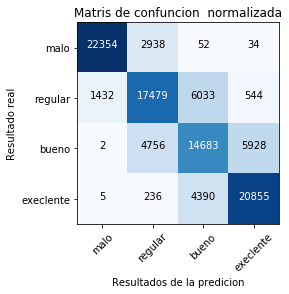

Porcentaje total de los aciertos 
0.740958110911


(0.74095811091121799, 0.25904188908878206)

In [183]:
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matris de confuncion  normalizada')


<hr><h1>Random Forest</h1><hr>

In [185]:
classifier=RandomForestClassifier(n_estimators=50)

In [186]:
classifier = classifier.fit(temporal_x, temporal_y)

Matriz de confuncio no normalizada
[[22354  2938    52    34]
 [ 1432 17479  6033   544]
 [    2  4756 14683  5928]
 [    5   236  4390 20855]]


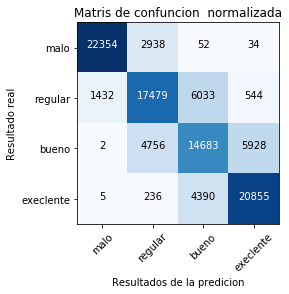

Porcentaje total de los aciertos 
0.740958110911


(0.74095811091121799, 0.25904188908878206)

In [187]:
algo = classifier.predict(pred_test) 
labels=[0,1,2,3]
labels_string=["malo","regular","bueno","execlente"]
y_true = tar_test.values
y_pred = algo
cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
plot_confusion_matrix(cnf_matrix, classes=labels_string, normalize=False,title='Matris de confuncion  normalizada')
